In [319]:
#importing modules

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [320]:
file = pd.read_excel('C:/Users/Ankit Gokhroo/Downloads/KPMG_VI_New_raw_data_update_final (1).xlsx',
                     sheat = ['Title Sheet','Transactions','NewCustomerList','CustomerDemographic',
                              'CustomerAddress'])

In [321]:
TitleSheet = pd.read_excel('C:/Users/Ankit Gokhroo/Downloads/KPMG_VI_New_raw_data_update_final (1).xlsx',sheet_name =
                     'Title Sheet')
Transactions = pd.read_excel('C:/Users/Ankit Gokhroo/Downloads/KPMG_VI_New_raw_data_update_final (1).xlsx',sheet_name =
                     'Transactions')
NewCustomerList = pd.read_excel('C:/Users/Ankit Gokhroo/Downloads/KPMG_VI_New_raw_data_update_final (1).xlsx',sheet_name =
                     'NewCustomerList')
CustomerDemographic = pd.read_excel('C:/Users/Ankit Gokhroo/Downloads/KPMG_VI_New_raw_data_update_final (1).xlsx',sheet_name =
                     'CustomerDemographic')
CustomerAddress = pd.read_excel('C:/Users/Ankit Gokhroo/Downloads/KPMG_VI_New_raw_data_update_final (1).xlsx',sheet_name =
                     'CustomerAddress')

In [233]:
#Transactions
Transactions.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0


In [234]:
Transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
transaction_id             20000 non-null int64
product_id                 20000 non-null int64
customer_id                20000 non-null int64
transaction_date           20000 non-null datetime64[ns]
online_order               19640 non-null float64
order_status               20000 non-null object
brand                      19803 non-null object
product_line               19803 non-null object
product_class              19803 non-null object
product_size               19803 non-null object
list_price                 20000 non-null float64
standard_cost              19803 non-null float64
product_first_sold_date    19803 non-null float64
dtypes: datetime64[ns](1), float64(4), int64(3), object(5)
memory usage: 2.0+ MB


In [235]:
Transactions.columns

Index(['transaction_id', 'product_id', 'customer_id', 'transaction_date',
       'online_order', 'order_status', 'brand', 'product_line',
       'product_class', 'product_size', 'list_price', 'standard_cost',
       'product_first_sold_date'],
      dtype='object')

In [236]:
Transactions.describe()

,transaction_id,product_id,customer_id,online_order,list_price,standard_cost,product_first_sold_date
count,20000.000000,20000.00000,20000.000000,19640.000000,20000.000000,19803.000000,19803.000000
mean,10000.500000,45.36465,1738.246050,0.500458,1107.829449,556.046951,38199.776549
std,5773.647028,30.75359,1011.951046,0.500013,582.825242,405.955660,2875.201110
min,1.000000,0.00000,1.000000,0.000000,12.010000,7.210000,33259.000000
25%,5000.750000,18.00000,857.750000,0.000000,575.270000,215.140000,35667.000000
50%,10000.500000,44.00000,1736.000000,1.000000,1163.890000,507.580000,38216.000000
75%,15000.250000,72.00000,2613.000000,1.000000,1635.300000,795.100000,40672.000000
max,20000.000000,100.00000,5034.000000,1.000000,2091.470000,1759.850000,42710.000000


# Data Preprocessing

In [237]:
#identify missing values
Transactions.isnull().sum()

transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order               360
order_status                 0
brand                      197
product_line               197
product_class              197
product_size               197
list_price                   0
standard_cost              197
product_first_sold_date    197
dtype: int64

In [238]:
missing_data=Transactions.isnull()

In [239]:
for column in missing_data.columns.values.tolist():
    print(column)
    print(missing_data[column].value_counts())
    print("")

transaction_id
False    20000
Name: transaction_id, dtype: int64

product_id
False    20000
Name: product_id, dtype: int64

customer_id
False    20000
Name: customer_id, dtype: int64

transaction_date
False    20000
Name: transaction_date, dtype: int64

online_order
False    19640
True       360
Name: online_order, dtype: int64

order_status
False    20000
Name: order_status, dtype: int64

brand
False    19803
True       197
Name: brand, dtype: int64

product_line
False    19803
True       197
Name: product_line, dtype: int64

product_class
False    19803
True       197
Name: product_class, dtype: int64

product_size
False    19803
True       197
Name: product_size, dtype: int64

list_price
False    20000
Name: list_price, dtype: int64

standard_cost
False    19803
True       197
Name: standard_cost, dtype: int64

product_first_sold_date
False    19803
True       197
Name: product_first_sold_date, dtype: int64



In [240]:
Transactions['online_order'].value_counts()

1.0    9829
0.0    9811
Name: online_order, dtype: int64

In [242]:
Transactions['online_order'].replace(np.nan,2,inplace=True) #2 indicates unknown here

In [243]:
Transactions['brand'].value_counts()

Solex             4253
Giant Bicycles    3312
WeareA2B          3295
OHM Cycles        3043
Trek Bicycles     2990
Norco Bicycles    2910
Name: brand, dtype: int64

In [244]:
Transactions['brand'].replace(np.nan,'Solex',inplace=True)

In [245]:
Transactions['product_line'].value_counts()

Standard    14176
Road         3970
Touring      1234
Mountain      423
Name: product_line, dtype: int64

In [246]:
Transactions['product_line'].replace(np.nan,'Standard',inplace=True)

In [247]:
Transactions['product_class'].value_counts()

medium    13826
high       3013
low        2964
Name: product_class, dtype: int64

In [248]:
Transactions['product_class'].replace(np.nan,'medium',inplace=True)

In [249]:
Transactions['product_size'].value_counts()

medium    12990
large      3976
small      2837
Name: product_size, dtype: int64

In [250]:
Transactions['product_size'].replace(np.nan,'medium',inplace=True)

In [251]:
Transactions['standard_cost'].value_counts()

388.920000    465
954.820000    396
53.620000     274
161.600000    235
260.140000    233
             ... 
151.960000    124
206.350000    114
270.299988      1
667.400024      1
312.735016      1
Name: standard_cost, Length: 103, dtype: int64

In [252]:
avg_standard_cost=Transactions['standard_cost'].mean(axis=0)
avg_standard_cost

556.0469512209421

In [253]:
Transactions['standard_cost'].replace(np.nan,avg_standard_cost,inplace=True)

In [254]:
Transactions = Transactions.dropna(how='any',axis=0) 

In [257]:
#identify missing values
Transactions.isnull().sum()            #now we have no null values

transaction_id             0
product_id                 0
customer_id                0
transaction_date           0
online_order               0
order_status               0
brand                      0
product_line               0
product_class              0
product_size               0
list_price                 0
standard_cost              0
product_first_sold_date    0
dtype: int64

In [259]:
duplicates = Transactions.duplicated()
Transactions[duplicates].sum()                  #no duplicates

transaction_id             0.0
product_id                 0.0
customer_id                0.0
transaction_date           0.0
online_order               0.0
order_status               0.0
brand                      0.0
product_line               0.0
product_class              0.0
product_size               0.0
list_price                 0.0
standard_cost              0.0
product_first_sold_date    0.0
dtype: float64

In [322]:
NewCustomerList.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,state,country,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,...,QLD,Australia,6,0.51,0.6375,0.796875,0.677344,1,1,1.718750
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,...,NSW,Australia,11,0.48,0.4800,0.600000,0.510000,1,1,1.718750
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,...,VIC,Australia,5,0.90,0.9000,0.900000,0.900000,1,1,1.718750
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,...,QLD,Australia,1,0.67,0.8375,0.837500,0.837500,4,4,1.703125
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,...,NSW,Australia,9,0.51,0.5100,0.637500,0.637500,4,4,1.703125


In [323]:
NewCustomerList.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
first_name                             1000 non-null object
last_name                              971 non-null object
gender                                 1000 non-null object
past_3_years_bike_related_purchases    1000 non-null int64
DOB                                    983 non-null datetime64[ns]
job_title                              894 non-null object
job_industry_category                  835 non-null object
wealth_segment                         1000 non-null object
deceased_indicator                     1000 non-null object
owns_car                               1000 non-null object
tenure                                 1000 non-null int64
address                                1000 non-null object
postcode                               1000 non-null int64
state                                  1000 non-null object
country                                1000 non-null 

In [324]:
NewCustomerList.describe()

,past_3_years_bike_related_purchases,tenure,postcode,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,49.836000,11.388000,3019.227000,7.397000,0.750130,0.842625,0.948381,0.876371,498.819000,498.819000,0.881714
std,27.796686,5.037145,848.895767,2.758804,0.208765,0.253585,0.306039,0.291862,288.810997,288.810997,0.293525
min,0.000000,0.000000,2000.000000,1.000000,0.400000,0.400000,0.400000,0.340000,1.000000,1.000000,0.340000
25%,26.750000,7.000000,2209.000000,6.000000,0.577500,0.630000,0.710000,0.639375,250.000000,250.000000,0.649531
50%,51.000000,11.000000,2800.000000,8.000000,0.750000,0.825000,0.933750,0.858500,500.000000,500.000000,0.860000
75%,72.000000,15.000000,3845.500000,9.000000,0.940000,1.025000,1.171875,1.075781,750.250000,750.250000,1.075000
max,99.000000,22.000000,4879.000000,12.000000,1.100000,1.375000,1.718750,1.703125,1000.000000,1000.000000,1.718750


In [325]:
# Drop Unnamed Column
columns = ['Unnamed: 16','Unnamed: 17','Unnamed: 18','Unnamed: 19','Unnamed: 20']
NewCustomerList = NewCustomerList.drop(columns, axis=1)

In [326]:
NewCustomerList.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,14,45 Shopko Center,4500,QLD,Australia,6,1,1.718750
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,16,14 Mccormick Park,2113,NSW,Australia,11,1,1.718750
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,10,5 Colorado Crossing,3505,VIC,Australia,5,1,1.718750
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,5,207 Annamark Plaza,4814,QLD,Australia,1,4,1.703125
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,19,115 Montana Place,2093,NSW,Australia,9,4,1.703125


In [327]:
#identify missing values
NewCustomerList.isnull().sum()

first_name                               0
last_name                               29
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     17
job_title                              106
job_industry_category                  165
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                   0
address                                  0
postcode                                 0
state                                    0
country                                  0
property_valuation                       0
Rank                                     0
Value                                    0
dtype: int64

In [328]:
for column in missing_data.columns.values.tolist():
    print(column)
    print(missing_data[column].value_counts())
    print("")

transaction_id
False    20000
Name: transaction_id, dtype: int64

product_id
False    20000
Name: product_id, dtype: int64

customer_id
False    20000
Name: customer_id, dtype: int64

transaction_date
False    20000
Name: transaction_date, dtype: int64

online_order
False    19640
True       360
Name: online_order, dtype: int64

order_status
False    20000
Name: order_status, dtype: int64

brand
False    19803
True       197
Name: brand, dtype: int64

product_line
False    19803
True       197
Name: product_line, dtype: int64

product_class
False    19803
True       197
Name: product_class, dtype: int64

product_size
False    19803
True       197
Name: product_size, dtype: int64

list_price
False    20000
Name: list_price, dtype: int64

standard_cost
False    19803
True       197
Name: standard_cost, dtype: int64

product_first_sold_date
False    19803
True       197
Name: product_first_sold_date, dtype: int64



In [329]:
NewCustomerList['last_name'].value_counts()

Sissel           2
Hallt            2
Borsi            2
Crellim          2
Van den Velde    2
                ..
Cains            1
Pithcock         1
Baribal          1
Marrow           1
Craft            1
Name: last_name, Length: 961, dtype: int64

In [330]:
NewCustomerList['last_name'].replace(np.nan,'unknown',inplace=True)

In [331]:
NewCustomerList['job_title'].value_counts()

Associate Professor         15
Environmental Tech          14
Software Consultant         14
Chief Design Engineer       13
Assistant Manager           12
                            ..
Media Manager I              1
Systems Administrator IV     1
Accountant I                 1
Engineer II                  1
Automation Specialist IV     1
Name: job_title, Length: 184, dtype: int64

In [332]:
NewCustomerList['job_title'].replace(np.nan,'unknown',inplace=True)

In [333]:
NewCustomerList['job_industry_category'].value_counts()

Financial Services    203
Manufacturing         199
Health                152
Retail                 78
Property               64
IT                     51
Entertainment          37
Argiculture            26
Telecommunications     25
Name: job_industry_category, dtype: int64

In [334]:
NewCustomerList['job_industry_category'].replace(np.nan,'Financial Services',inplace=True)

In [335]:
NewCustomerList = NewCustomerList.dropna(how='any',axis=0) 

In [336]:
duplicates = NewCustomerList.duplicated()     #no duplicates
NewCustomerList[duplicates].sum()

first_name                             0.0
last_name                              0.0
gender                                 0.0
past_3_years_bike_related_purchases    0.0
DOB                                    0.0
job_title                              0.0
job_industry_category                  0.0
wealth_segment                         0.0
deceased_indicator                     0.0
owns_car                               0.0
tenure                                 0.0
address                                0.0
postcode                               0.0
state                                  0.0
country                                0.0
property_valuation                     0.0
Rank                                   0.0
Value                                  0.0
dtype: float64

In [337]:
#identify missing values       #no null values
NewCustomerList.isnull().sum()

first_name                             0
last_name                              0
gender                                 0
past_3_years_bike_related_purchases    0
DOB                                    0
job_title                              0
job_industry_category                  0
wealth_segment                         0
deceased_indicator                     0
owns_car                               0
tenure                                 0
address                                0
postcode                               0
state                                  0
country                                0
property_valuation                     0
Rank                                   0
Value                                  0
dtype: int64

In [338]:
CustomerDemographic.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0


In [339]:
CustomerDemographic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 13 columns):
customer_id                            4000 non-null int64
first_name                             4000 non-null object
last_name                              3875 non-null object
gender                                 4000 non-null object
past_3_years_bike_related_purchases    4000 non-null int64
DOB                                    3913 non-null datetime64[ns]
job_title                              3494 non-null object
job_industry_category                  3344 non-null object
wealth_segment                         4000 non-null object
deceased_indicator                     4000 non-null object
default                                3698 non-null object
owns_car                               4000 non-null object
tenure                                 3913 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(2), object(9)
memory usage: 406.4+ KB


In [340]:
CustomerDemographic.describe()

,customer_id,past_3_years_bike_related_purchases,tenure
count,4000.000000,4000.000000,3913.000000
mean,2000.500000,48.890000,10.657041
std,1154.844867,28.715005,5.660146
min,1.000000,0.000000,1.000000
25%,1000.750000,24.000000,6.000000
50%,2000.500000,48.000000,11.000000
75%,3000.250000,73.000000,15.000000
max,4000.000000,99.000000,22.000000


In [341]:
CustomerDemographic.isnull().sum()

customer_id                              0
first_name                               0
last_name                              125
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     87
job_title                              506
job_industry_category                  656
wealth_segment                           0
deceased_indicator                       0
default                                302
owns_car                                 0
tenure                                  87
dtype: int64

In [342]:
CustomerDemographic['last_name'].value_counts()

Ramsdell    3
Pristnor    3
Nisuis      2
Elgey       2
Vearnals    2
           ..
Dumelow     1
Watkiss     1
Hebron      1
Mallinar    1
Jankin      1
Name: last_name, Length: 3725, dtype: int64

In [343]:
CustomerDemographic['last_name'].replace(np.nan,'unknown',inplace=True)

In [344]:
CustomerDemographic['job_title'].value_counts()

Business Systems Development Analyst    45
Tax Accountant                          44
Social Worker                           44
Internal Auditor                        42
Legal Assistant                         41
                                        ..
Account Representative II                4
Health Coach I                           3
Research Assistant III                   3
Health Coach III                         3
Developer I                              1
Name: job_title, Length: 195, dtype: int64

In [345]:
CustomerDemographic['job_title'].replace(np.nan,'unknown',inplace=True)

In [346]:
CustomerDemographic['job_industry_category'].value_counts()

Manufacturing         799
Financial Services    774
Health                602
Retail                358
Property              267
IT                    223
Entertainment         136
Argiculture           113
Telecommunications     72
Name: job_industry_category, dtype: int64

In [347]:
CustomerDemographic['job_industry_category'].replace(np.nan,'Manufacturing',inplace=True)

In [348]:
CustomerDemographic['default'].value_counts()

100                                       113
1                                         112
-1                                        111
-100                                       99
â°â´âµâââ                                  53
                                         ... 
'"''''"                                    31
/dev/null; touch /tmp/blns.fail ; echo     30
âªâªtestâª                                 29
ì¸ëë°í ë¥´                                 27
,ãã»:*:ã»ãâ( â» Ï â» )ãã»:*:ã»ãâ           25
Name: default, Length: 90, dtype: int64

In [349]:
CustomerDemographic['tenure'].value_counts()

7.0     235
5.0     228
11.0    221
10.0    218
16.0    215
8.0     211
18.0    208
12.0    202
9.0     200
14.0    200
6.0     192
13.0    191
4.0     191
17.0    182
15.0    179
1.0     166
3.0     160
19.0    159
2.0     150
20.0     96
22.0     55
21.0     54
Name: tenure, dtype: int64

In [350]:
avg_tenure=CustomerDemographic['tenure'].mean()
avg_tenure

10.65704063378482

In [351]:
CustomerDemographic['tenure'].replace(np.nan,avg_tenure,inplace=True)

In [352]:
CustomerDemographic = CustomerDemographic.dropna(how='any',axis=0) 

In [353]:
CustomerDemographic.isnull().sum() #null values

customer_id                            0
first_name                             0
last_name                              0
gender                                 0
past_3_years_bike_related_purchases    0
DOB                                    0
job_title                              0
job_industry_category                  0
wealth_segment                         0
deceased_indicator                     0
default                                0
owns_car                               0
tenure                                 0
dtype: int64

In [354]:
CustomerDemographic['gender'].value_counts()

Female    1922
Male      1773
F            1
Femal        1
M            1
Name: gender, dtype: int64

In [355]:
CustomerDemographic['gender'] = CustomerDemographic['gender'].replace('F','Female').replace('M','Male').replace('Femal','Female').replace('U','Unspecified')

In [356]:
CustomerDemographic['gender'].value_counts()

Female    1924
Male      1774
Name: gender, dtype: int64

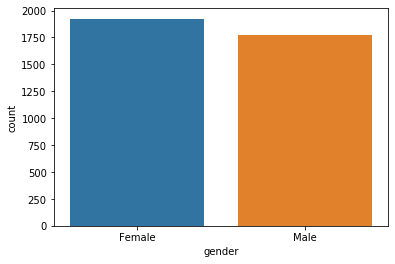

In [357]:
sns.countplot(CustomerDemographic['gender'])

In [358]:
CustomerDemographic.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
3,4,Talbot,unknown,Male,33,1961-10-03,unknown,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,Manufacturing,Affluent Customer,N,NIL,Yes,8.0


In [359]:
CustomerDemographic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3698 entries, 0 to 3999
Data columns (total 13 columns):
customer_id                            3698 non-null int64
first_name                             3698 non-null object
last_name                              3698 non-null object
gender                                 3698 non-null object
past_3_years_bike_related_purchases    3698 non-null int64
DOB                                    3698 non-null datetime64[ns]
job_title                              3698 non-null object
job_industry_category                  3698 non-null object
wealth_segment                         3698 non-null object
deceased_indicator                     3698 non-null object
default                                3698 non-null object
owns_car                               3698 non-null object
tenure                                 3698 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(2), object(9)
memory usage: 564.5+ KB


In [360]:
NewCustomerList.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,14,45 Shopko Center,4500,QLD,Australia,6,1,1.718750
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,16,14 Mccormick Park,2113,NSW,Australia,11,1,1.718750
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,10,5 Colorado Crossing,3505,VIC,Australia,5,1,1.718750
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,5,207 Annamark Plaza,4814,QLD,Australia,1,4,1.703125
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,19,115 Montana Place,2093,NSW,Australia,9,4,1.703125


In [361]:
NewCustomerList.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 983 entries, 0 to 999
Data columns (total 18 columns):
first_name                             983 non-null object
last_name                              983 non-null object
gender                                 983 non-null object
past_3_years_bike_related_purchases    983 non-null int64
DOB                                    983 non-null datetime64[ns]
job_title                              983 non-null object
job_industry_category                  983 non-null object
wealth_segment                         983 non-null object
deceased_indicator                     983 non-null object
owns_car                               983 non-null object
tenure                                 983 non-null int64
address                                983 non-null object
postcode                               983 non-null int64
state                                  983 non-null object
country                                983 non-null object
prope

In [362]:
CustomerDemographic['customer_id'].iloc[-1]

4000

In [363]:
NewCustomerList.insert(0, 'customer_id', range(4001, 4001 + len(NewCustomerList)))

In [364]:
NewCustomerList.head()


,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value
0,4001,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,14,45 Shopko Center,4500,QLD,Australia,6,1,1.718750
1,4002,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,16,14 Mccormick Park,2113,NSW,Australia,11,1,1.718750
2,4003,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,10,5 Colorado Crossing,3505,VIC,Australia,5,1,1.718750
3,4004,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,5,207 Annamark Plaza,4814,QLD,Australia,1,4,1.703125
4,4005,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,19,115 Montana Place,2093,NSW,Australia,9,4,1.703125


In [365]:
CustomerDemographic.sort_values(by=['customer_id'], inplace=True)

In [366]:
CustomerDemographic.head()


,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
3,4,Talbot,unknown,Male,33,1961-10-03,unknown,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,Manufacturing,Affluent Customer,N,NIL,Yes,8.0


In [367]:
new_df = pd.concat([CustomerDemographic, NewCustomerList], ignore_index=True, sort=False)

In [368]:
new_df.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value
0,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,Talbot,unknown,Male,33,1961-10-03,unknown,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,Manufacturing,Affluent Customer,N,NIL,Yes,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [369]:
CustomerDemographic = new_df

In [370]:
CustomerDemographic

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value
0,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,Talbot,unknown,Male,33,1961-10-03,unknown,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,Manufacturing,Affluent Customer,N,NIL,Yes,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4676,4979,Ferdinand,Romanetti,Male,60,1959-10-07,Paralegal,Financial Services,Affluent Customer,N,NaN,No,9.0,2 Sloan Way,2200.0,NSW,Australia,7.0,996.0,0.374
4677,4980,Burk,Wortley,Male,22,2001-10-17,Senior Sales Associate,Health,Mass Customer,N,NaN,No,6.0,04 Union Crossing,2196.0,NSW,Australia,10.0,997.0,0.357
4678,4981,Melloney,Temby,Female,17,1954-10-05,Budget/Accounting Analyst IV,Financial Services,Affluent Customer,N,NaN,Yes,15.0,33475 Fair Oaks Junction,4702.0,QLD,Australia,2.0,997.0,0.357
4679,4982,Dickie,Cubbini,Male,30,1952-12-17,Financial Advisor,Financial Services,Mass Customer,N,NaN,Yes,19.0,57666 Victoria Way,4215.0,QLD,Australia,2.0,997.0,0.357


In [371]:
current_year=2020
for i in CustomerDemographic['DOB']:
    CustomerDemographic['age']=current_year - pd.DatetimeIndex(CustomerDemographic['DOB']).year

In [372]:
CustomerDemographic

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,...,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value,age
0,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,...,Yes,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,67
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,...,Yes,16.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,...,Yes,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,66
3,4,Talbot,unknown,Male,33,1961-10-03,unknown,IT,Mass Customer,N,...,No,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,Manufacturing,Affluent Customer,N,...,Yes,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4676,4979,Ferdinand,Romanetti,Male,60,1959-10-07,Paralegal,Financial Services,Affluent Customer,N,...,No,9.0,2 Sloan Way,2200.0,NSW,Australia,7.0,996.0,0.374,61
4677,4980,Burk,Wortley,Male,22,2001-10-17,Senior Sales Associate,Health,Mass Customer,N,...,No,6.0,04 Union Crossing,2196.0,NSW,Australia,10.0,997.0,0.357,19
4678,4981,Melloney,Temby,Female,17,1954-10-05,Budget/Accounting Analyst IV,Financial Services,Affluent Customer,N,...,Yes,15.0,33475 Fair Oaks Junction,4702.0,QLD,Australia,2.0,997.0,0.357,66
4679,4982,Dickie,Cubbini,Male,30,1952-12-17,Financial Advisor,Financial Services,Mass Customer,N,...,Yes,19.0,57666 Victoria Way,4215.0,QLD,Australia,2.0,997.0,0.357,68


In [373]:
print(min(CustomerDemographic['age']))

18


In [375]:
x1 = CustomerDemographic[(CustomerDemographic['age'] <= 30)]
x1 = len(x1)

x2 = CustomerDemographic[(CustomerDemographic['age']>30)&(CustomerDemographic['age']<60)]
x2 = len(x2)

x3 = CustomerDemographic[(CustomerDemographic['age'] >= 60)]
x3 =len(x3)

In [376]:
m1 = CustomerDemographic[(CustomerDemographic['age'] <= 30) & 
          (CustomerDemographic['gender']=='Male')] 
m1 = len(m1)

m2 = CustomerDemographic[(CustomerDemographic['age']>30) &(CustomerDemographic['age']<60) & 
          (CustomerDemographic['gender']=='Male')] 
m2 = len(m2)

m3 = CustomerDemographic[(CustomerDemographic['age'] >= 60) & 
          (CustomerDemographic['gender']=='Male')] 
m3 = len(m3)

In [377]:
f1 = CustomerDemographic[(CustomerDemographic['age'] <= 30) & 
          (CustomerDemographic['gender']=='Female')] 
f1 = len(f1)

f2 = CustomerDemographic[(CustomerDemographic['age']>30) &(CustomerDemographic['age']<60) & 
          (CustomerDemographic['gender']=='Female')] 
f2 = len(f2)

f3 = CustomerDemographic[(CustomerDemographic['age'] >= 60) & 
          (CustomerDemographic['gender']=='Female')] 
f3 =len(f3)

In [378]:
X = ['Under 30', 'Between 30 and 60', 'Over 60']
x = [x1, x2, x3]

M = ['Under 30', 'Between 30 and 60', 'Over 60']
m = [m1, m2, m3]

F = ['Under 30', 'Between 30 and 60', 'Over 60']
f = [f1, f2, f3]

Text(2.1, 3000, 'Total')

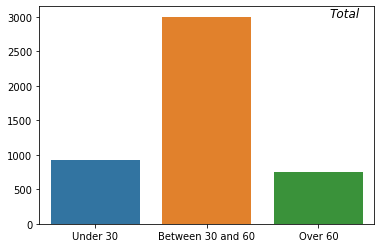

In [379]:

sns.barplot(X,x)
plt.text(2.1,3000, "Total", fontsize = 12, color='Black', fontstyle='italic')

Text(2.1, 1400, 'Male')

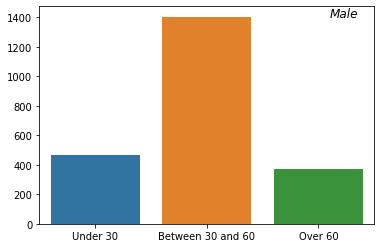

In [380]:
sns.barplot(M,m)
plt.text(2.1,1400, "Male", fontsize = 12, color='Black', fontstyle='italic')


Text(1.98, 1600, 'Female')

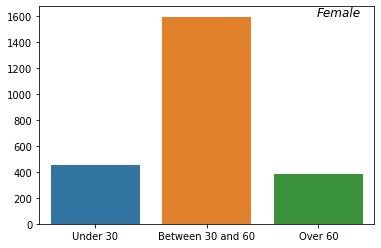

In [381]:
sns.barplot(x = F,y = f)
plt.text(1.98,1600, "Female", fontsize = 12, color='Black', fontstyle='italic')


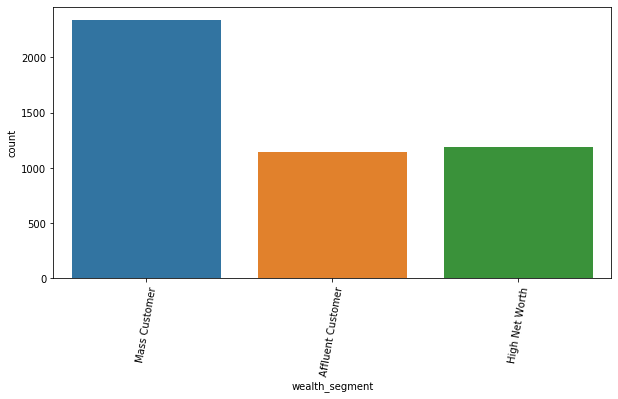

In [391]:

fig = plt.figure(figsize=(10,5))
chart=sns.countplot(x='wealth_segment',data=CustomerDemographic)
chart.set_xticklabels(chart.get_xticklabels(), rotation=80)
plt.show()

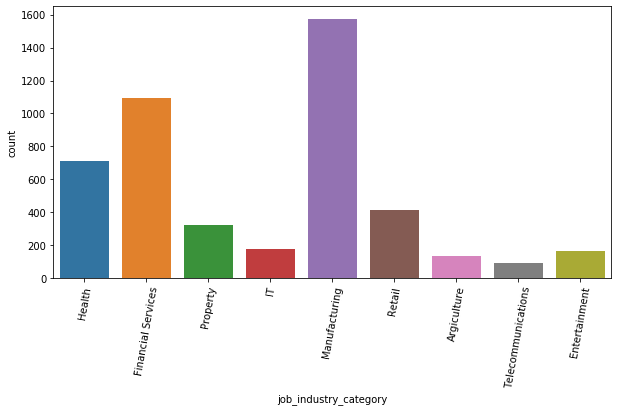

In [392]:
fig = plt.figure(figsize=(10,5))
chart=sns.countplot(x='job_industry_category',data=CustomerDemographic)
chart.set_xticklabels(chart.get_xticklabels(), rotation=80)
plt.show()

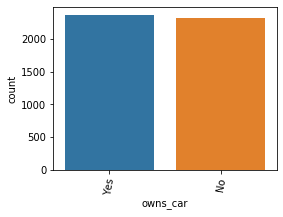

In [397]:
fig = plt.figure(figsize=(4,3))
chart=sns.countplot(x='owns_car',data=CustomerDemographic)
chart.set_xticklabels(chart.get_xticklabels(), rotation=80)
plt.show()